In [ ]:
!pip install tensorflow Pillow

import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

In [ ]:
model_path = "/content/deforestation_classifier.h5"
try:
    model = keras.models.load_model(model_path)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

In [ ]:
img_height, img_width = 128, 128

def preprocess_image(img_path):
    try:
        img = Image.open(img_path).convert('RGB')
        img = img.resize((img_height, img_width))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

In [ ]:
def predict_deforestation(image_path):
    img_array = preprocess_image(image_path)
    if img_array is None:
        return None

    prediction = model.predict(img_array)

    if prediction[0][0] >= 0.5:
        return "Deforestation Detected"
    else:
        return "No Deforestation Detected"

In [ ]:
deforested_dir = "/content/test/deforested"
no_deforested_dir = "/content/test/no_deforested"

if not os.path.exists(deforested_dir):
    os.makedirs(deforested_dir)
if not os.path.exists(no_deforested_dir):
    os.makedirs(no_deforested_dir)

Saving img8.jpeg to img8.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: img8.jpeg
Prediction: Deforestation Detected


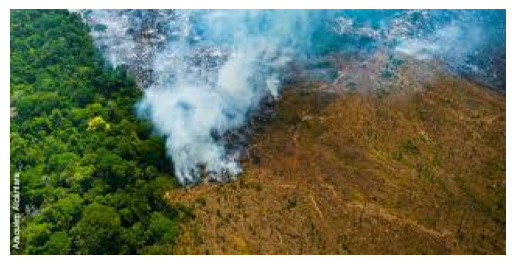

In [ ]:
uploaded = files.upload()

for fn, file_content in uploaded.items():
    try:
        result = predict_deforestation(fn)

        if result == "Deforestation Detected":
            print(f"Image: {fn}")
            print(f"Prediction: {result}")
            target_dir = deforested_dir
        else:
            print(f"Image: {fn}")
            print(f"Prediction: {result}")
            target_dir = no_deforested_dir

        from io import BytesIO
        img = Image.open(BytesIO(file_content)).convert("RGB")

        new_image_path = os.path.join(target_dir, fn)
        img.save(new_image_path)

        plt.imshow(img)
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")